# MATH2319 Machine Learning Project Phase 1<br> Predicting whether a patient has Liver Disease given certain Biochemical levels with their body

#### Name : Michael Baker<br>Student ID : s3544106

## Contents
* [Introduction](#1)
  - [Objective](#1.1)
  - [Dataset](#1.2)
      - [Target Feature](#1.2.1)
      - [Descriptive Features](#1.2.2)
      
* [Data Quality Report](#2)
  
* [Preprocessing](#3)
  - [Removing missing values](#3.1)
  - [Analysis of the Categorical Feature](#3.2)
  - [Analysis of the Numerical Features](#3.3)
* [Comparative Scatterplots](#4)
  - [Total & Direct Bilirubin](#4.1)
  - [Alkaline Phosphotase, Alamine Aminotransferase & Aspartate_Aminotransferase](#4.2)
  - [Total Proteins, Albumin and the Albumin/Globulin Ratio](#4.3)
* [Pre-Modelling Summary](#5)

## Introduction<a class="anchor" id="1"></a>
### Objective<a class="anchor" id="1.1"></a>
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. The objective of this dataset is to predict whether a given patient has got liver disease given the levels of certain chemicals compounds found in their body as well as the results of specific tests with no additional information reguarding the status of the patients. 

### Dataset <a class="anchor" id="1.2"></a>
This dataset sourced from the Kaggle competition website https://www.kaggle.com/uciml/indian-liver-patient-records, contains 416 recorded patients with liver disease and 167 recorded patients with no liver disease, collected from North East of Andhra Pradesh, India. This set is split into 10 descriptive functions and 1 target function.

#### Target Feature<a class="anchor" id="1.2.1"></a><br>
Our target feature is a binary classification of which after analysis the given patient has Liver Disease or not.

**Dataset:** Binary 1 = Positve for Liver Disease, 2 = Negative for Live Disease

#### Descriptive Features<a class="anchor" id="1.2.2"></a><br>

**Gender:** Male, Female

**Total Bilirubin:** Continuous

**Direct Bilirubin:** Continuous

**Alkaline Phosphotase** Continuous

**Alamine Aminotransferase:** Continuous

**Aspartate Aminotransferase:** Continuous

**Total Protiens:** Continuous

**Albumin:** Continuous

**Albumin and Globulin Ratio:** Continuous

Note: Any patient over the age of 89 has been labelled as 90

For more information on what each chemical feature does please refer to the glossary.

## Data Quality Report<a class="anchor" id="2"></a>

In [1]:
import pandas as pd
xls = pd.ExcelFile('indian_liver_patient.xlsx')
df = xls.parse(index_col=None)
df.to_csv('file.csv')

Through the ABT below it can be seen that half of the features are roughly normally distributed but Total Bilirbuin, Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase each have some extreme outliers that may point to the data been exponentially skewed right.
For the categorical feature Gender, it shows that about 75% of the patient cataloged are male. 

In [2]:
df.describe(include = ['int64','float64'])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [3]:
df.describe(include ='object')

,Gender
count,583
unique,2
top,Male
freq,441


In [4]:
df.sample(n=5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
257,44,Male,0.8,0.2,335,148,86,5.6,3.0,1.1,1
144,45,Female,3.5,1.5,189,63,87,5.6,2.9,1.0,1
153,52,Male,0.6,0.1,178,26,27,6.5,3.6,1.2,2
481,45,Male,2.3,1.3,282,132,368,7.3,4.0,1.2,1
77,68,Female,0.6,0.1,1620,95,127,4.6,2.1,0.8,1


In [5]:
print(f"Dimension of the data set is {df.shape} \n")
print(f"Data Types are: ")
print(df.dtypes)

Dimension of the data set is (583, 11) 

Data Types are: 
Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


## Preprocessing<a class="anchor" id="3"></a>
### Removing Missing values<a class="anchor" id="3.1"></a>

In [6]:
print(f"Doing a quick to check to see if the dataset contains any missing data points: ")
df.isnull().sum()

Doing a quick to check to see if the dataset contains any missing data points: 


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

There are 4 confirmed missing values so because there is no way to calculate the missing variables i'm removing the entries from the set.

In [7]:
import numpy as np
df['Albumin_and_Globulin_Ratio'].replace('', np.nan, inplace=True)
df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True)
print("Missing Values check")
print(df.isnull().sum())

Missing Values check
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


## Analysis of the Categorical Feature<a class="anchor" id="3.2"></a>

We can see through Figure 1 below that the ratio of gender diversity in the dataset is 3:1. we can also see through Figures 2 - 7 that both genders express similar trends in there results, thus showing that the gender of the patient shouldn't have an exaggerated effect when modelling the data.

Note: Due to the extreme values contained within half the features of the dataset those features will be plotted using only the first 75% of there data, as the extreme values make it impossible to judge the differences (if any) in the trends plotted.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Figure 1: Bar Chart of " +'Gender', fontsize = 12)
color_codes=True
total = float(len(df))
ax = df['Gender'].value_counts(normalize = True).plot(
kind = "bar", alpha = 0.5)

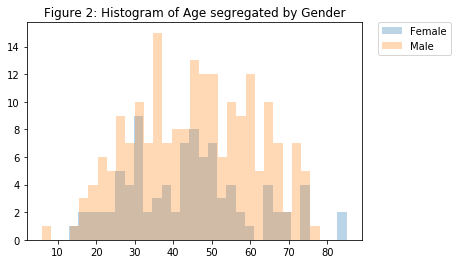

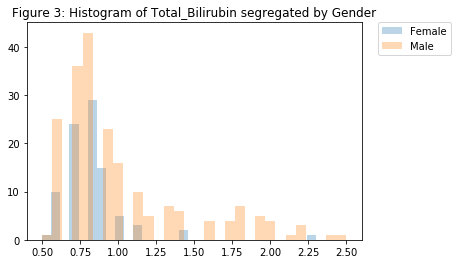

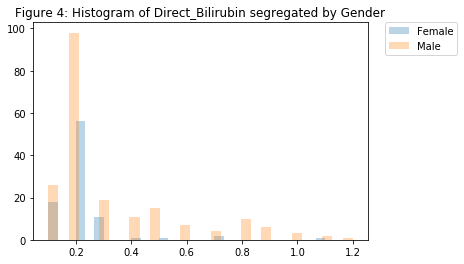

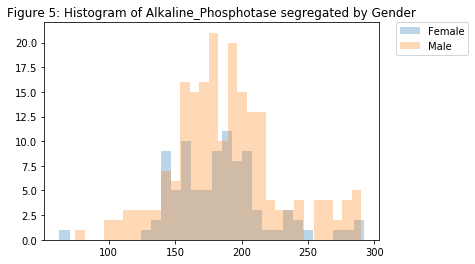

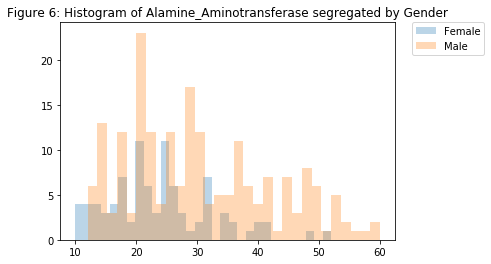

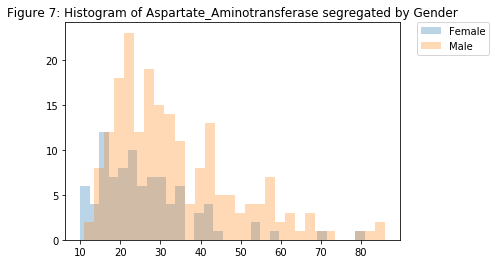

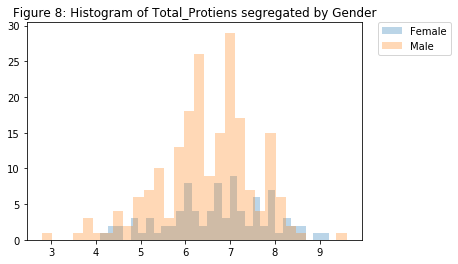

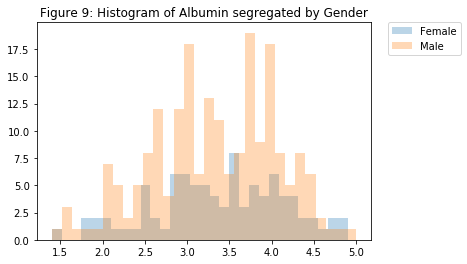

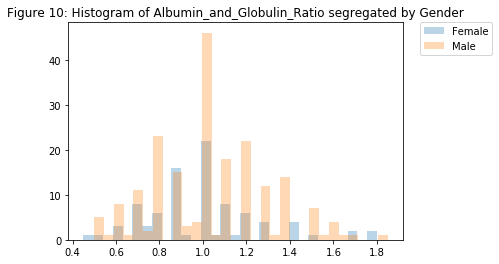

In [18]:
dropped = df[df.Aspartate_Aminotransferase < 87]
dropped = dropped[dropped.Total_Bilirubin < 2.6]
dropped = dropped[dropped.Alamine_Aminotransferase < 60.5]
dropped = dropped[dropped.Direct_Bilirubin < 1.3]
dropped = dropped[dropped.Alkaline_Phosphotase < 298]
i = 2
for col in ['Age', 'Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']:
    data1 = dropped.loc[df['Gender']=="Female", col]
    data2 = dropped.loc[df['Gender']=="Male", col]
    plt.hist(data1, alpha = 0.3, bins = 30)
    plt.hist(data2, alpha = 0.3, bins = 30)
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by Gender")
    i = i + 1
    plt.legend(dropped['Gender'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## Analysis of the Numerical Features<a class="anchor" id="3.3"></a>

In [10]:
import seaborn as sns
def BoxHistogramPlot(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_hist)
    plt.show()

The combined boxplots and histograms below are used to express the numerical features of the data set.<br>Figure 11: shows a normal distribution of the age of the patients, though the bulk of them are between 35-55 years old.<br>Figure 12-18: shows a heavily right skewed graph with 75% of the data points are contained within the first 15% of the range of the data. This makes sense given the nature of the chemicals been tested. Each of these chemicals alone are not enough to express the healthiness of the liver, they can each be effected by different symptoms within the body and may or maynot show large variation when the Liver malfunctions.<br>
Lastly figures 19-21: show similar levels of been normally distributed, with the couple of outliers within the Albumin/Globulin ratio feature.

C:\Users\Michael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

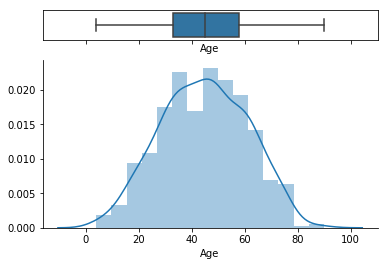

<Figure size 432x288 with 0 Axes>

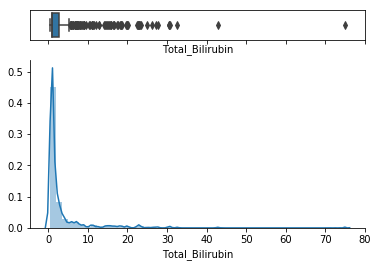

<Figure size 432x288 with 0 Axes>

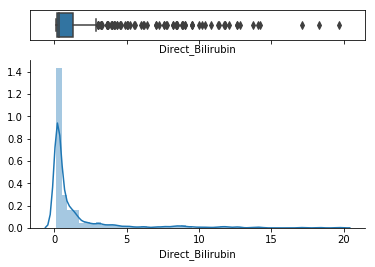

<Figure size 432x288 with 0 Axes>

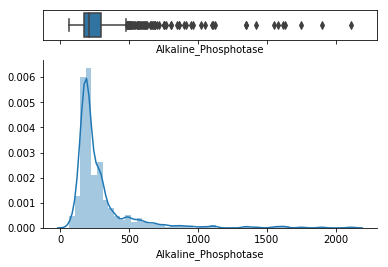

<Figure size 432x288 with 0 Axes>

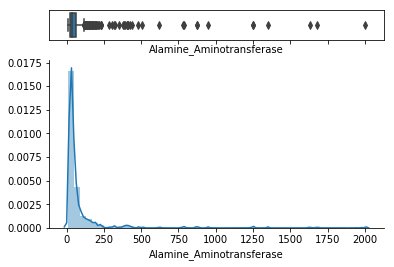

<Figure size 432x288 with 0 Axes>

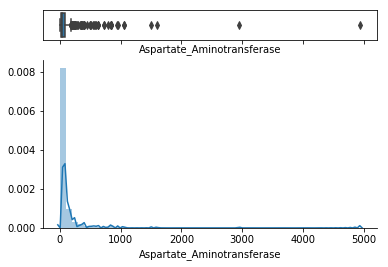

<Figure size 432x288 with 0 Axes>

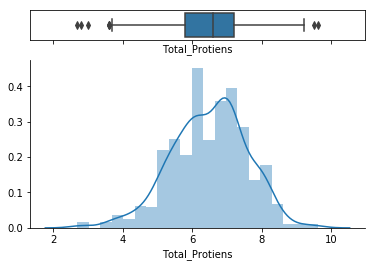

<Figure size 432x288 with 0 Axes>

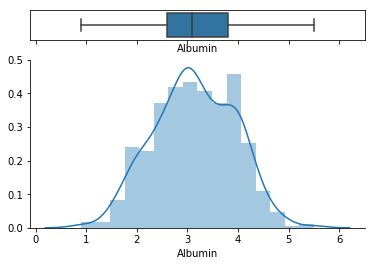

<Figure size 432x288 with 0 Axes>

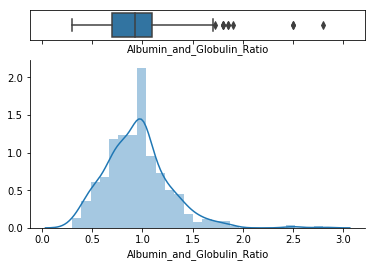

In [11]:
i=10
for feature in ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']:
    plt.suptitle("Figure "+ str(i) +": Histogram and Box Plot of " + feature)
    BoxHistogramPlot(df[feature])
    plt.show()
    i = i+1

## Comparative Scatterplots<a class="anchor" id="4"></a>

For these plots the dataset will be split into 3 groups the first is Total and Direct Bilirubin, the second Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase, Lastly will be the features related to protiens. This is done as the combined pairplot model would be too large and by breaking it up the relationships between features will be easier to see.


## Total & Direct Bilirubin<a class="anchor" id="4.1"></a>
Figure 22: Expresses the relationship between Direct and Total Bilirubin with respect to the target feature. Through the grid plots it can be shown that they have a positive correlation with each other. It can be seen that a low reading of either Bilirubin can result in either outcome but the high to extreme values result in a positive liver disease reading.<br>

Figure 23: Shows the relationship between Direct and Total Bilirubin againest the other features. When compared to the other features the resulting plots show high amounts of similarity. Because of this I could remove one of the two Bilirubin varibles given that the Total Bilirubin is a sum of the Direct Bilirubin and another varible. However there method of generating the Total Bilirubin is very complicated taking a lot of chemical processes into account thus both features will be included in further analysis. We can also see that reguardless of age or protein levels both outcomes are possible but with respect to the other 3 variables it is only with the normal level readings that we see a mix of both outcomes, with the high to extreme readings the only outcome in liver Disease.

Text(0.5, 1.08, 'Figure 22: Comparing Total Bilirubin to Direct Bilirubin')

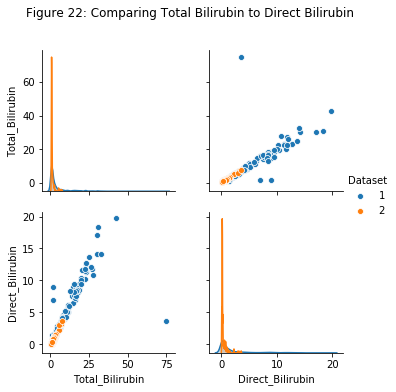

In [12]:
sns.pairplot(df, x_vars=['Total_Bilirubin','Direct_Bilirubin'], y_vars = ['Total_Bilirubin', 'Direct_Bilirubin'],diag_kind = "kde", hue = 'Dataset').fig.suptitle("Figure 22: Comparing Total Bilirubin to Direct Bilirubin", y=1.08)

Text(0.5, 1.08, 'Figure 23: Total & Direct Bilirubin vs other Features Comparision Plots')

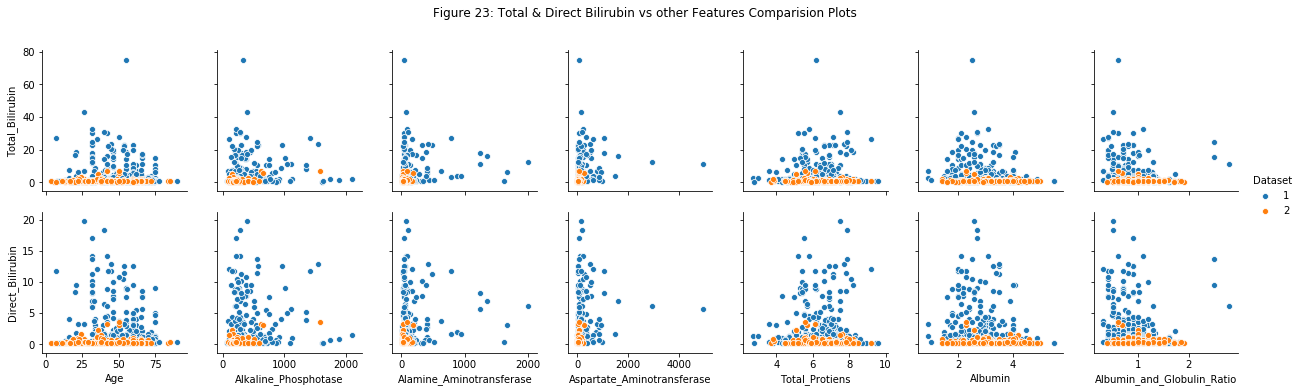

In [13]:
sns.pairplot(df, x_vars=['Age','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], y_vars = ['Total_Bilirubin', 'Direct_Bilirubin'],diag_kind = "kde", hue = 'Dataset').fig.suptitle("Figure 23: Total & Direct Bilirubin vs other Features Comparision Plots", y=1.08)

## Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase<a class="anchor" id="4.2"></a>
Below in Figure 24, we can see that the realtionship between the Alkaline to Alamine and Aspartate follows a almost inverse logarithmic curve expressing that it is possible to have high readings in either or both features, but in the majority of cases a low reading in both the Alamine and Aspartate features results in a dianoses of no liver disease. It can also be seen that there is a slight positive correlation between the Alamine and Aspartate features this is to do with how they react in the body and thus both will be used in further analysis.<br>

Through Figure 25 we see that all 3 features show similar plot ill be with Alkaline with a larger degree of variability, with similar assumptions that can be made towards the other features as shown through Figure 23. That the extreme values of either Bilirubin, Alkaline, Alamine and Aspotate resulting in a postive diagnosis and a mix of both with in the normal level readings.

Text(0.5, 1.08, 'Figure 24: Comparing Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase')

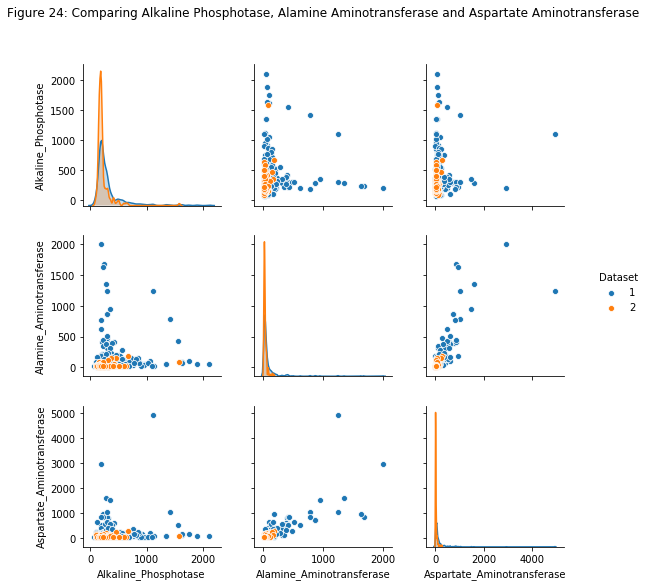

In [14]:
sns.pairplot(df, x_vars=['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'], y_vars = ['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'], hue = 'Dataset').fig.suptitle("Figure 24: Comparing Alkaline Phosphotase, Alamine Aminotransferase and Aspartate Aminotransferase", y=1.08)

Text(0.5, 1.08, 'Figure 25: Alkaline Phosphotase, Alamine Aminotransferase and Aspartate_Aminotransferase vs other Features Comparision Plots')

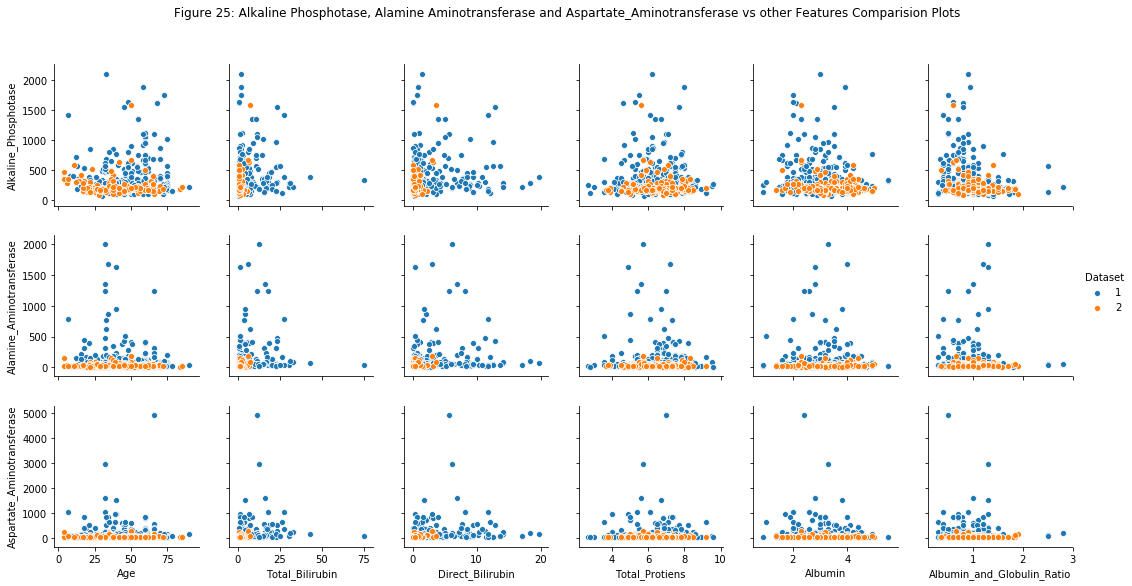

In [15]:
sns.pairplot(df, x_vars=['Age','Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], y_vars = ['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'], hue = 'Dataset').fig.suptitle("Figure 25: Alkaline Phosphotase, Alamine Aminotransferase and Aspartate_Aminotransferase vs other Features Comparision Plots", y=1.08)

## Total Proteins, Albumin and the Albumin/Globulin Ratio<a class="anchor" id="4.3"></a>
In Figure 26 we can see a positive correlation between the Total Protein and Albumin features, this makes sense given that Albumin is one of the proteins used in that total, though we will still keep both varibles as the remining protein/s involed in the accumulation of the total is unknown. Further more we also see a positive correlation between the ratio and Albumin for obivous reasons and no real discernible pattern between the total proteins and ratio features. Lastly the spread of positive to negvative diagnoses is evenly spread throughout each feature with a slightly higher Albumin reading resulting in less positives but only slightly.

Through Figure 27 we see that all 3 features show a similar distribution of the data points. With the exception of Age which has a random distribution across all ages, similar assumptions that can be made towards the other features as shown through Figures 23 & 25. 

Text(0.5, 1.08, 'Figure 26: Comparing Total Protein, Albumin and the Albumin/Globulin ratio')

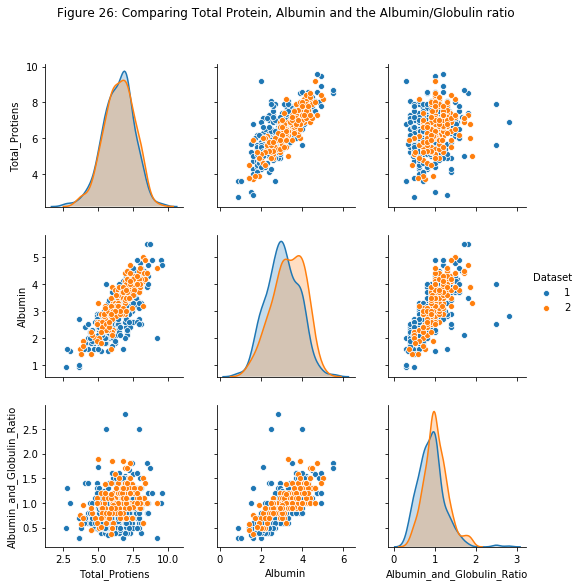

In [16]:
sns.pairplot(df, x_vars=['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], y_vars = ['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], hue = 'Dataset').fig.suptitle("Figure 26: Comparing Total Protein, Albumin and the Albumin/Globulin ratio", y=1.08)

Text(0.5, 1.08, 'Figure 27: Total Protein, Albumin and the Albumin/Globulin ratio vs other Features Comparision Plots')

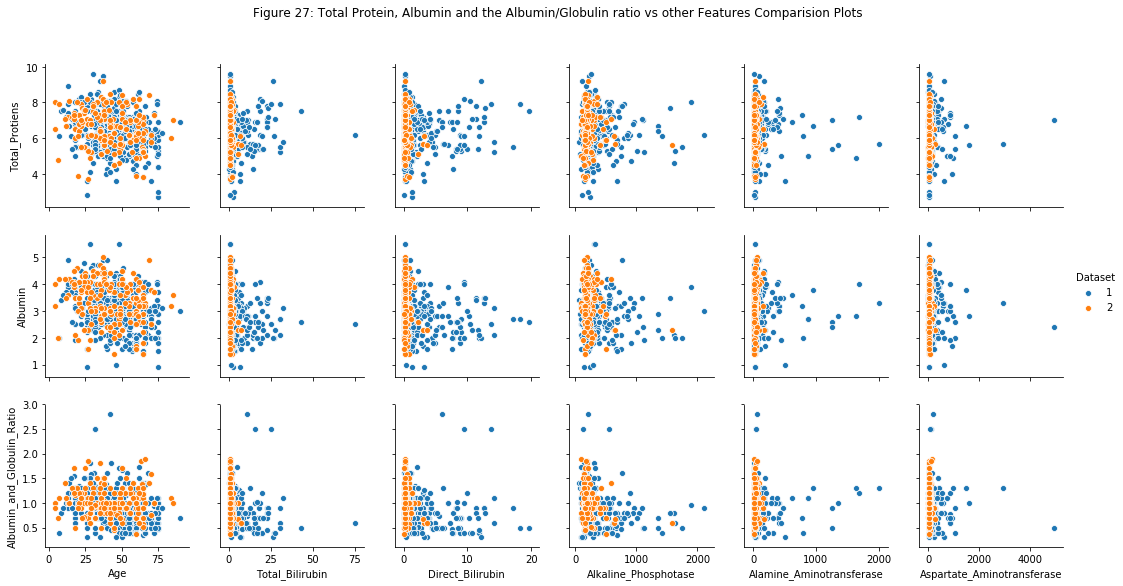

In [17]:
sns.pairplot(df, x_vars=['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'], y_vars = ['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio'], hue = 'Dataset').fig.suptitle("Figure 27: Total Protein, Albumin and the Albumin/Globulin ratio vs other Features Comparision Plots", y=1.08)

## Pre-Modelling Summary<a class="anchor" id="5"></a><br>
Through preparing the data, I removed the 4 entries that contained missing values in the Albumin/Globulin ratio. Decided that keep the male and female data together as no large difference in trends could bee seen. Also I will be continuing with all the variables as it will be through a combination of all the features that we will be able to predict our outcome. Lastly further pre-modelling analysis didn't seem nessassary as I only have 1 Categorical feature and the numerical features are pretty well fleshed out.